In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Position_Salaries.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


**we are not splitting the data  in to train and test set as we have only ten values in it <br>
as the data is already present in the categorical values so we dont require to so the categorical data to it**

In [6]:
X=df.iloc[:,1:2].values
y=df.iloc[:,2:3].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [7]:
# fitting the SVR to the dataset
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf')
svr_reg.fit(X,y)

/Users/learning/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/learning/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
y_pred=svr_reg.predict([[6.5]])
y_pred

array([130001.55760156])

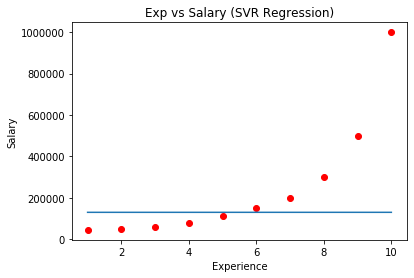

In [13]:
#plotting the SVR 
plt.scatter(X,y,c='r')
plt.plot(X,svr_reg.predict(X))
plt.title("Exp vs Salary (SVR Regression)")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

**As we have ssen the above output . This was causing due to not having inbuilt feature scaling for SVR .So lets apply the feature scaling and run our algorithm**

In [15]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
sc_y=StandardScaler()
X=sc_X.fit_transform(X)
y=sc_y.fit_transform(y)

In [16]:
# fitting the SVR to the dataset
from sklearn.svm import SVR
svr_reg=SVR(kernel='rbf')
svr_reg.fit(X,y)

/Users/learning/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
y_pred=svr_reg.predict([[6.5]])
y_pred

array([0.01158103])

**As we have applied the feature scaling on X and y . now we have apply inverse scaling on y and transformation on x to get back our value**

In [21]:
y_newpred=sc_y.inverse_transform(svr_reg.predict(sc_X.transform([[6.5]])))
y_newpred

array([170370.0204065])

**We have a good prediction value as we are assuming from the start that his salary will be of 16000 as he claimed earlier**

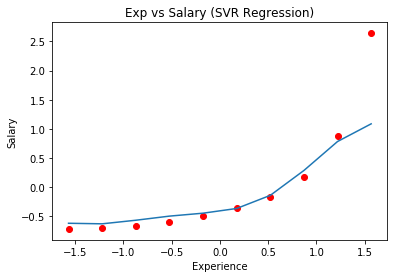

In [18]:
#plotting the SVR 
plt.scatter(X,y,c='r')
plt.plot(X,svr_reg.predict(X))
plt.title("Exp vs Salary (SVR Regression)")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()